In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
ptaki = pd.read_csv('../../ptaki_dane/birds.csv')

In [3]:
ptaki.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [4]:
ptak_0_path = ptaki['filepaths'][0]
path ='../../ptaki_dane/'

ptak_0_path = path + ptak_0_path

In [5]:
ptak_0 = cv2.imread(ptak_0_path)

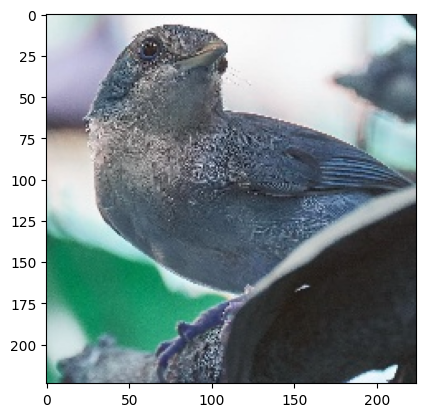

In [6]:
plt.imshow(ptak_0);

In [7]:
# dopisuje sobie sciezke do filderu w ktorym trzymam te zdjecia ptakow
ptaki['filepaths_custom'] = '../../ptaki_dane/' + ptaki['filepaths']
ptaki

,class id,filepaths,labels,data set,scientific name,filepaths_custom
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/001.jpg
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/007.jpg
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/008.jpg
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/009.jpg
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/002.jpg
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...


In [12]:
ptaki[ptaki['data set'] == 'valid']

,class id,filepaths,labels,data set,scientific name,filepaths_custom
87260,0.0,valid/ABBOTTS BABBLER/1.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/1.jpg
87261,0.0,valid/ABBOTTS BABBLER/2.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/2.jpg
87262,0.0,valid/ABBOTTS BABBLER/3.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/3.jpg
87263,0.0,valid/ABBOTTS BABBLER/4.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/4.jpg
87264,0.0,valid/ABBOTTS BABBLER/5.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/5.jpg
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...


In [13]:
train = ptaki[ptaki['data set'] == 'train'].sample(20000, random_state=42)
test = ptaki[ptaki['data set'] == 'test']
valid = ptaki[ptaki['data set'] == 'valid']

In [24]:
train['filepaths_custom']

55036        ../../ptaki_dane/train/NICOBAR PIGEON/081.jpg
267           ../../ptaki_dane/train/ABBOTTS BOOBY/105.jpg
35177     ../../ptaki_dane/train/FIORDLAND PENGUIN/058.jpg
17911     ../../ptaki_dane/train/BURCHELLS COURSER/018.jpg
7168     ../../ptaki_dane/train/AUSTRALASIAN FIGBIRD/09...
                               ...                        
47886                   ../../ptaki_dane/train/IWI/054.jpg
3645          ../../ptaki_dane/train/AMERICAN ROBIN/66.jpg
11925       ../../ptaki_dane/train/BLACK FRANCOLIN/045.jpg
43644              ../../ptaki_dane/train/HAWFINCH/157.jpg
67731          ../../ptaki_dane/train/RUDDY SHELDUCK/5.jpg
Name: filepaths_custom, Length: 20000, dtype: object

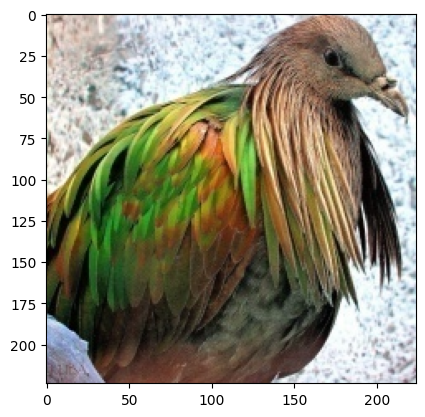

In [30]:
a = cv2.imread('../../ptaki_dane/train/NICOBAR PIGEON/081.jpg')
plt.imshow(a)

In [39]:
train_dir = '../../ptaki_dane/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [61]:
test_dir = '../../ptaki_dane/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [62]:
valid_dir = '../../ptaki_dane/valid'
filepaths = []
labels = []

folds = os.listdir(valid_dir)
for fold in folds:
    foldpath = os.path.join(valid_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

In [63]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


In [58]:
classes = list(train_gen.class_indices.keys())

images, labels = next(train_gen)

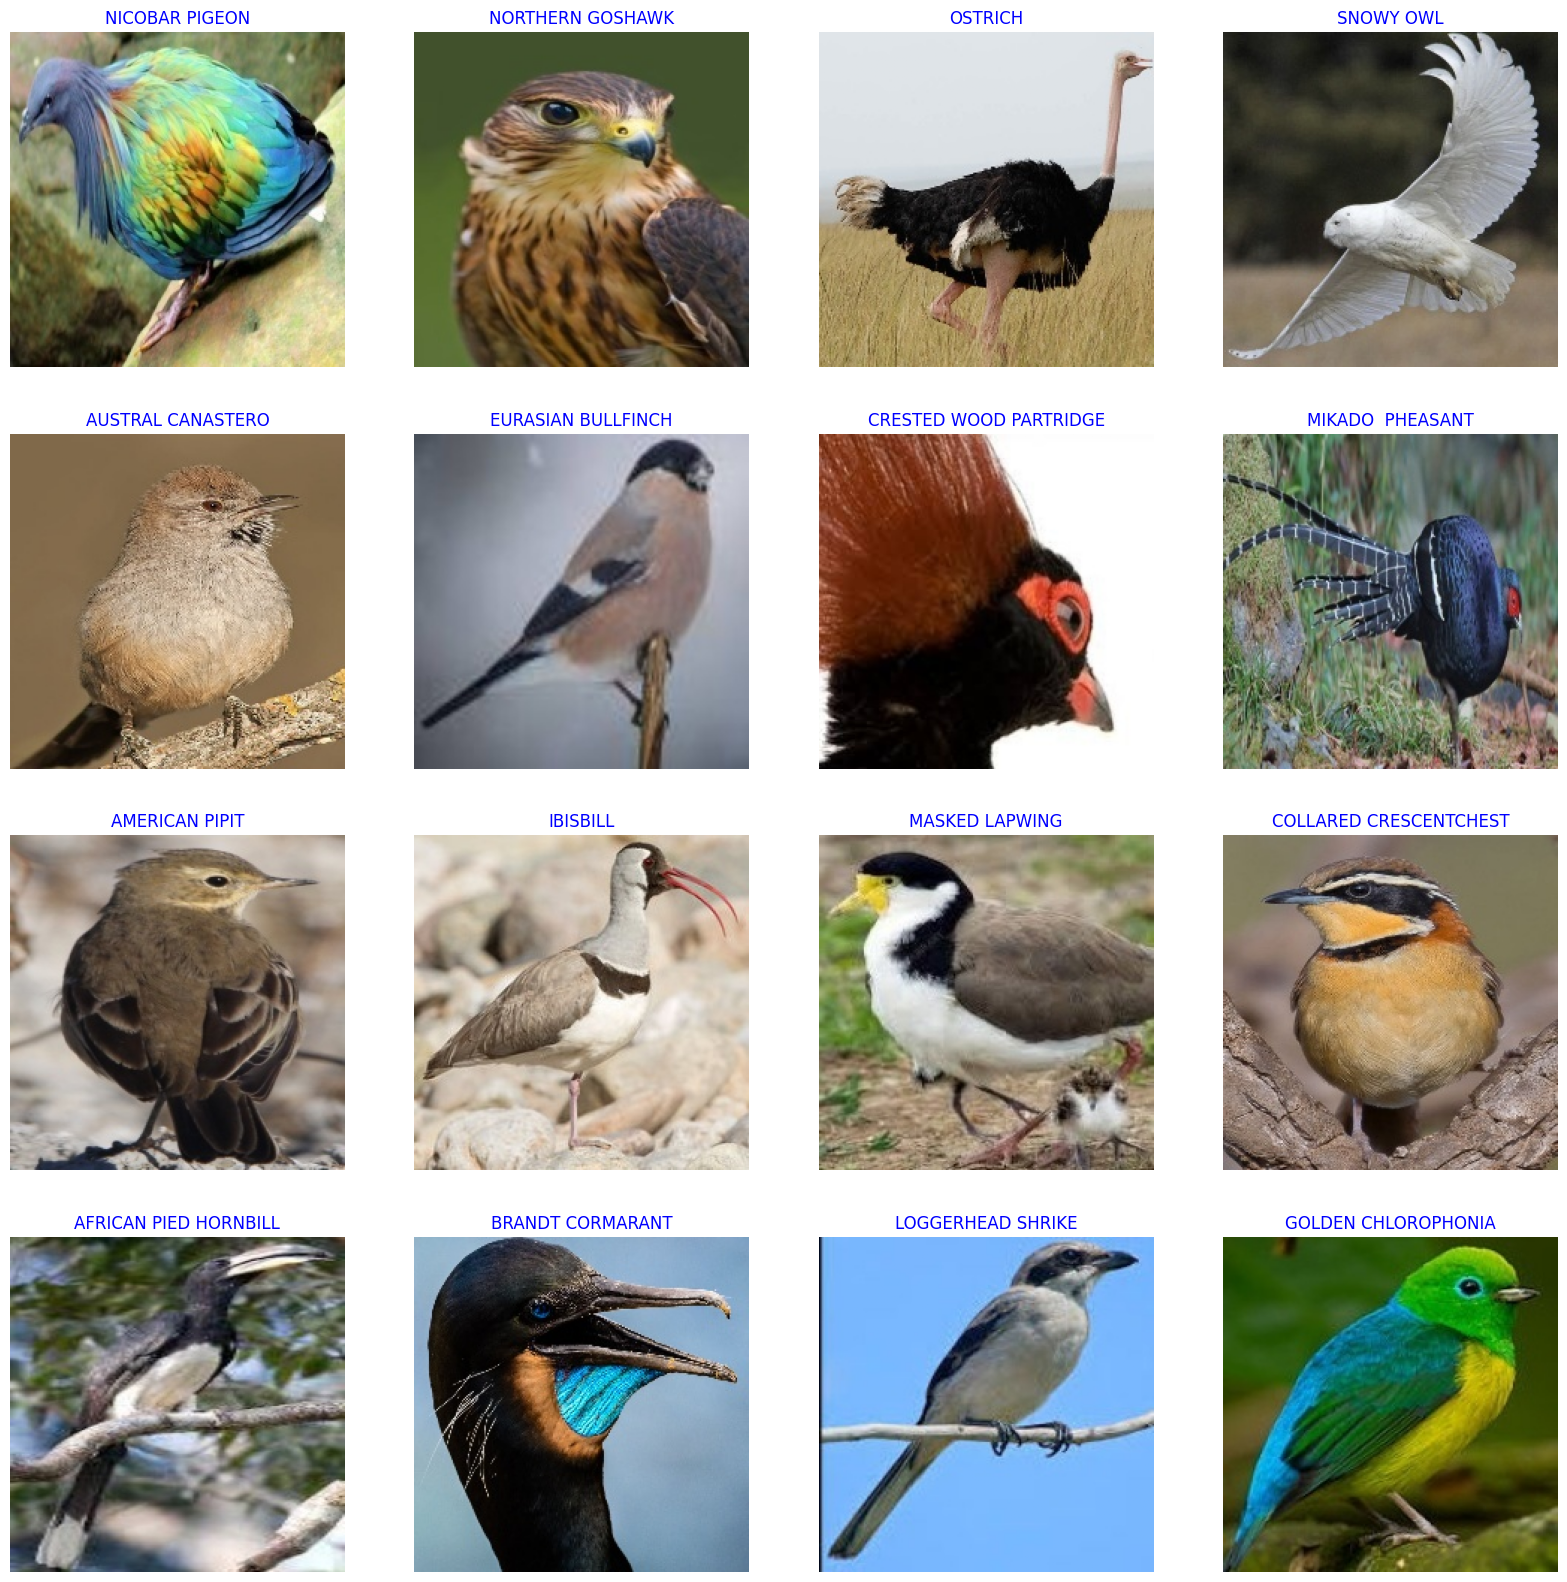

In [59]:
plt.figure(figsize= (20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()